In [1]:
import Leverage as lv
import Karmed as ka
import matplotlib.pyplot as plt
import numpy as np

**STATIONARY BANDIT**

In [5]:
# Bandit params
no_bandits = 10
bandits = []
arms = 10
means = [0, 1.5, 0.2, -0.5, -0.1, 0.8, 0.65, 0.15, -0.3, 0.95]
sigmas = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
init_estim_vals = 0
ucb_params = (False, 0.5)

# Training params
iter_per_run = 10000
epsilon = 0.01

In [6]:
for i in range(no_bandits):
    bandits.append(ka.KarmedStationary(arms, means, sigmas, init_estim_vals, ucb_params))
    bandits[i].setTrainParams(iter_per_run, epsilon)

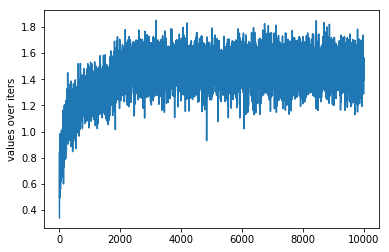

In [7]:
all_agents_iter_values = []
for b in range(no_bandits):
    iter_values, calculated_rewards = bandits[b].run()
    all_agents_iter_values.append(iter_values)

all_agents_iter_values = np.mean(all_agents_iter_values, axis=0)
plt.plot(all_agents_iter_values)
plt.ylabel('values over iters')
plt.show()

**NON-STATIONARY BANDIT**

In [1]:
import Leverage as lv
import Karmed as ka
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Bandit params
no_bandits = 10
bandits = []
arms = 10
means = [0, 1.5, 0.2, -0.5, -0.1, 0.8, 0.65, 0.15, -0.3, 0.95]
sigmas = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
init_estim_vals = 0
alpha = 0.2
normal_noise_mu = 0
normal_noise_sigma = 0.02

# Training params
iter_per_run = 10000
epsilon = 0.01

In [6]:
for i in range(no_bandits):
    bandits.append(ka.KarmedNonStationary(arms, means, sigmas, init_estim_vals, alpha))
    bandits[i].setTrainParams(iter_per_run, epsilon)
    bandits[i].setRandomNoise(normal_noise_mu, normal_noise_sigma)

In [ ]:
all_agents_iter_values = []
for b in range(no_bandits):
    iter_values, calculated_rewards, leverages = bandits[b].run()
    all_agents_iter_values.append(iter_values)

all_agents_iter_values = np.mean(all_agents_iter_values, axis=0)
plt.plot(all_agents_iter_values)
plt.ylabel('values over iters')
plt.show()

for lev in leverages:
    print('mu: ' + str(lev.getMu()) + '   sigma: ' + str(lev.getSigma()))

**UPPER-CONFIDENCE-BOUND ACTION SELECTION**

In [5]:
# Bandit params
no_bandits = 10
bandits = []
arms = 10
means = [0, 1.5, 0.2, -0.5, -0.1, 0.8, 0.65, 0.15, -0.3, 0.95]
sigmas = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
init_estim_vals = 0
ucb_params = (True, 0.5)

# Training params
iter_per_run = 10000
epsilon = 0.01

In [ ]:
for i in range(no_bandits):
    bandits.append(ka.KarmedStationary(arms, means, sigmas, init_estim_vals, ucb_params))
    bandits[i].setTrainParams(iter_per_run, epsilon)

In [ ]:
all_agents_iter_values = []
for b in range(no_bandits):
    iter_values, calculated_rewards = bandits[b].run()
    all_agents_iter_values.append(iter_values)

all_agents_iter_values = np.mean(all_agents_iter_values, axis=0)
plt.plot(all_agents_iter_values)
plt.ylabel('values over iters')
plt.show()